In [1]:
import sympy as sym
import numpy as np
import time
import cloudpickle

m = [0]*3

with open("Feasible_Solution/short2/steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("Feasible_Solution/short2/accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("Feasible_Solution/short2/decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
    
pub_time = 5/1000
run_time = 0


N = m[0].N[-1]
cN = m[0].cN[-1]

adder = 0
x = []
z = []
theta_l_L = []
r_L = []
theta_l_R = []
r_R = []

cN_time = []
cN_adder = 0
time = []

position_cN = 0

x_tmp = []
z_tmp = []
theta_l_L_tmp = []
r_L_tmp = []
theta_l_R_tmp = []
r_R_tmp = []


def interpolate(y_inter, cur_time, x_inter, position):
    # y_inter = data
    # x_inter = time
    ans = 0
    for i in range(position, len(x_inter)):
        if(x_inter[i]<=cur_time and cur_time<x_inter[i+1]):
            position = i
            ans = y_inter[i] + (cur_time - x_inter[i])*(y_inter[i+1] - y_inter[i])/(x_inter[i+1] - x_inter[i])
            return ans, position

        
for i in range(0, 3):
    if(i>0):
        adder += m[i-1].q[N,cN,'x'].value
        cN_adder += (m[i-1].tt[N,cN].value - m[i-1].tt[1,1].value)
    for n in range(1, N+1):
        for c in range(1, cN+1):
            cN_time.append(m[i].tt[n,c].value - m[i].tt[1,1].value + cN_adder)
            x_tmp.append(m[i].q[n,c,'x'].value + adder)
            z_tmp.append(m[i].q[n,c,'z'].value)
            theta_l_L_tmp.append(m[i].q[n,c,'theta_l_L'].value)
            r_L_tmp.append(m[i].q[n,c,'r_L'].value)
            theta_l_R_tmp.append(m[i].q[n,c,'theta_l_R'].value)
            r_R_tmp.append(m[i].q[n,c,'r_R'].value)
        
while 1:
    if(run_time>=cN_time[-1]):
        break

    tmp, position_cN = interpolate(x_tmp, run_time, cN_time, position_cN)
    x.append(tmp)
    tmp, position_cN = interpolate(z_tmp, run_time, cN_time, position_cN)
    z.append(tmp)
    tmp, position_cN = interpolate(theta_l_L_tmp, run_time, cN_time, position_cN)
    theta_l_L.append(tmp)
    tmp, position_cN = interpolate(r_L_tmp, run_time, cN_time, position_cN)
    r_L.append(tmp)    
    tmp, position_cN = interpolate(theta_l_R_tmp, run_time, cN_time, position_cN)
    theta_l_R.append(tmp)
    tmp, position_cN = interpolate(r_R_tmp, run_time, cN_time, position_cN)
    r_R.append(tmp)
    
    run_time += pub_time
    time.append(run_time)
    
print('done')

done


In [2]:
adder = 0
body_xb = []
body_yb = []
body_xf = []
body_yf = []
leg_xt1_L = []
leg_yt1_L = []
leg_xb1_L = []
leg_yb1_L = []
leg_xt2_L = []
leg_yt2_L = []
leg_xb2_L = []
leg_yb2_L = []
leg_xt1_R = []
leg_yt1_R = []
leg_xb1_R = []
leg_yb1_R = []
leg_xt2_R = []
leg_yt2_R = []
leg_xb2_R = []
leg_yb2_R = []

for i in range(0, len(x)):
        body_xb.append(x[i] - 0.5*m[0].lb.value*np.cos(0))
        body_yb.append(z[i] - 0.5*m[0].lb.value*np.sin(0))
        body_xf.append(x[i] + 0.5*m[0].lb.value*np.cos(0))
        body_yf.append(z[i] + 0.5*m[0].lb.value*np.sin(0))  

        # left-------------------------------------------------------------------------------------------------- 
        leg_xt1_L.append(x[i])
        leg_yt1_L.append(z[i]) 
        leg_xb1_L.append(x[i] + m[0].ll1.value*np.cos(theta_l_L[i]))
        leg_yb1_L.append(z[i] - m[0].ll1.value*np.sin(theta_l_L[i]))
        
        leg_xt2_L.append(x[i] + m[0].ll2*np.cos(theta_l_L[i]))
        leg_yt2_L.append(z[i] - m[0].ll2*np.sin(theta_l_L[i]))
        leg_xb2_L.append(x[i] + (m[0].ll2 + r_L[i])*np.cos(theta_l_L[i]))
        leg_yb2_L.append(z[i] - (m[0].ll2 + r_L[i])*np.sin(theta_l_L[i]))

        # right---------------------------------------------------------------------------------------------------
        leg_xt1_R.append(x[i])
        leg_yt1_R.append(z[i]) 
        leg_xb1_R.append(x[i] + m[0].ll1.value*np.cos(theta_l_R[i]))
        leg_yb1_R.append(z[i] - m[0].ll1.value*np.sin(theta_l_R[i])) 

        leg_xt2_R.append(x[i] + m[0].ll2.value*np.cos(theta_l_R[i]))
        leg_yt2_R.append(z[i] - m[0].ll2.value*np.sin(theta_l_R[i]))
        leg_xb2_R.append(x[i] + (m[0].ll2.value + r_R[i])*np.cos(theta_l_R[i]))
        leg_yb2_R.append(z[i] - (m[0].ll2.value + r_R[i])*np.sin(theta_l_R[i]))
            
        
print("done")

done


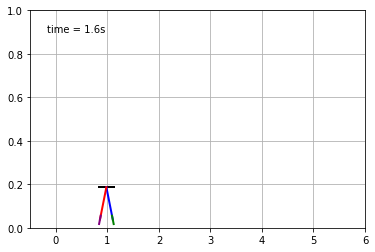

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02

fig = plt.figure() #figsize=(5, 4)
ax = fig.add_subplot(autoscale_on=False, xlim=(-0.5, 6), ylim=(0, 1.))
# ax.set_aspect('equal')
ax.grid()

line_B, = ax.plot([], [], '-', lw=2, c='black')
line_L1, = ax.plot([], [], '-', lw=2, c='blue')
line_L2, = ax.plot([], [], '-', lw=2, c='green')
line_R1, = ax.plot([], [], '-', lw=2, c='red')
line_R2, = ax.plot([], [], '-', lw=2, c='purple')

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    thisx = [body_xb[i], body_xf[i]]
    thisy = [body_yb[i], body_yf[i]]
    line_B.set_data(thisx, thisy)
    
    thisx = [leg_xt1_L[i], leg_xb1_L[i]]
    thisy = [leg_yt1_L[i], leg_yb1_L[i]]
    line_L1.set_data(thisx, thisy)  
    
    thisx = [leg_xt2_L[i], leg_xb2_L[i]]
    thisy = [leg_yt2_L[i], leg_yb2_L[i]]
    line_L2.set_data(thisx, thisy)
    
    thisx = [leg_xt1_R[i], leg_xb1_R[i]]
    thisy = [leg_yt1_R[i], leg_yb1_R[i]]
    line_R1.set_data(thisx, thisy)
    
    thisx = [leg_xt2_R[i], leg_xb2_R[i]]
    thisy = [leg_yt2_R[i], leg_yb2_R[i]]
    line_R2.set_data(thisx, thisy)    
    
    time_text.set_text(time_template % (time[i]))
    return line_B, line_L1, line_L2, line_R1, line_R2, time_text

animate = ani.FuncAnimation(fig, animate, len(body_xb), interval=time[-1]*1000/len(body_xb), blit=False, repeat=False)
# HTML(animate.to_jshtml())
HTML(animate.to_html5_video())

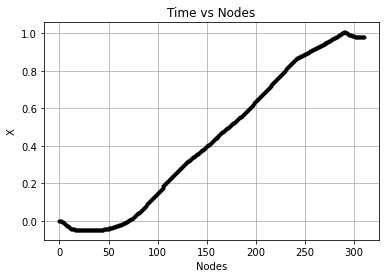

In [4]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as ani
# from IPython.display import HTML

plt.axes()
plt.grid(True)
Time = 0
for n in range (0, len(x)):
    time = x[n]
#     print(time)
    plt.plot(n,time,'k.')
    plt.xlabel('Nodes')
    plt.ylabel('X')
    plt.title('Time vs Nodes')
plt.show()